In [1]:
import pandas as pd
import datetime
import matplotlib.dates as mdates

# load URLs
confirmed_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

# read csvs
confirmed_cases = pd.read_csv(confirmed_cases_url)
deaths = pd.read_csv(deaths_url)

In [2]:
# verify successful read
print(confirmed_cases.head())
print(deaths.head())

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   1975

In [3]:
# choose cities of interest
cities = ['San Juan', 'Churchill', 'Santa Fe']

confirmed_dict = {}
deaths_dict = {}

# restrict to chosen cities
for city in cities:
    new_df_confirmed = confirmed_cases[confirmed_cases['Admin2']==city]
    confirmed_dict[city] = new_df_confirmed
    new_df_deaths = deaths[deaths['Admin2']==city]
    deaths_dict[city] = new_df_deaths

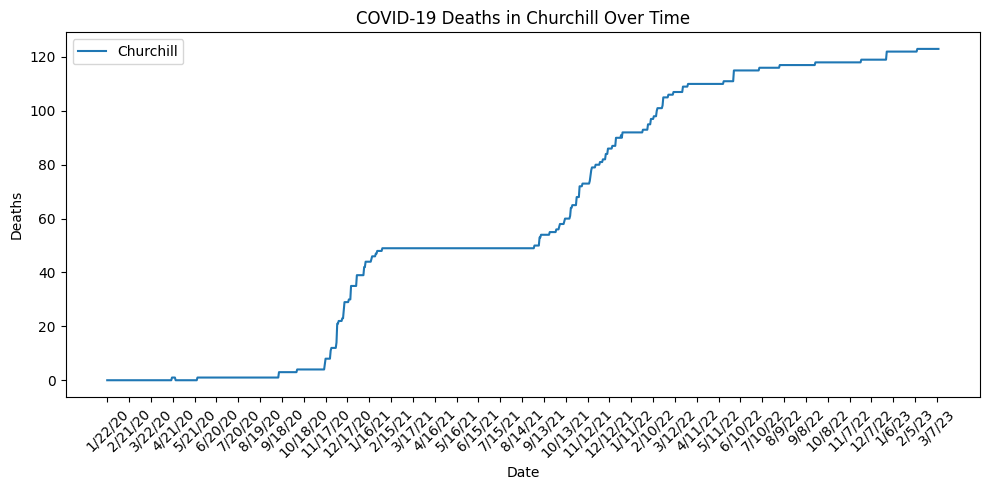

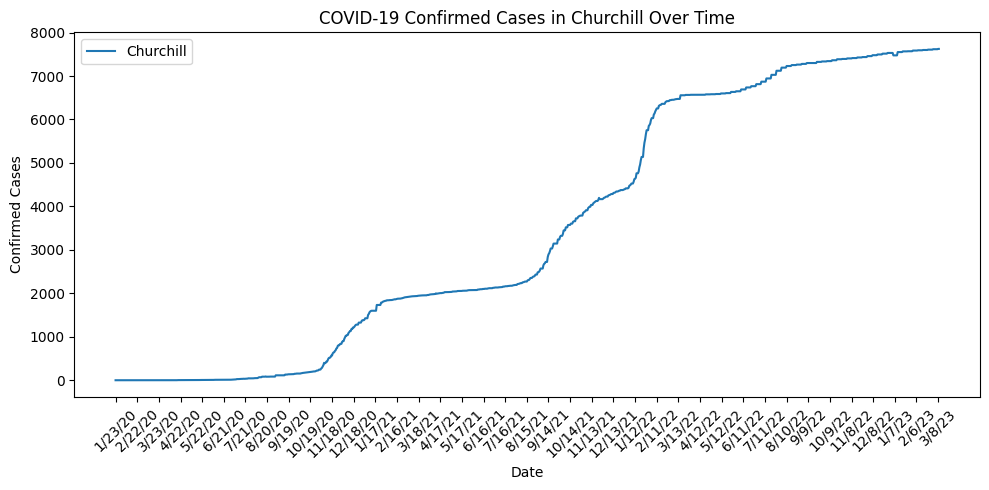

In [4]:
import matplotlib.pyplot as plt

churchill_death_df = deaths_dict['Churchill']
date_cols_deaths = churchill_death_df.columns[12:]
cases = churchill_death_df.iloc[0]

# Only select the date columns for plotting
death_dates = date_cols_deaths
deaths = cases[date_cols_deaths].astype(float)

plt.figure(figsize=(10, 5))
plt.plot(death_dates, deaths, label='Churchill')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths in Churchill Over Time')
tick_locs = range(0, len(death_dates), 30)
tick_labels = death_dates[tick_locs]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

churchill_confirmed_df = confirmed_dict['Churchill']
date_cols = churchill_confirmed_df.columns[12:]
confirmed_cases = churchill_confirmed_df.iloc[0]

# Only select the date columns for plotting
confirmed_dates = date_cols
confirmed_cases = confirmed_cases[date_cols].astype(float)

plt.figure(figsize=(10, 5))
plt.plot(confirmed_dates, confirmed_cases, label='Churchill')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Confirmed Cases in Churchill Over Time')
tick_locs = range(0, len(confirmed_dates), 30)
tick_labels = confirmed_dates[tick_locs]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()